In [38]:
import pandas as pd
import matplotlib as plt
import seaborn as sns

# Carregamento da base de dados
Dataset baixado manualmente do https://www.fundsexplorer.com.br/ranking#upTo--default-fiis-table e carregado no Kaggle

In [39]:
fiis_class = pd.read_excel('/kaggle/input/fiis-statusinvest/fiis-fundsexplorer (cpia manual).xlsx', header=2)
print(fiis_class.shape)
fiis_class.head()

(382, 27)


,FUNDOS,SETOR,PREÇO ATUAL (R$),LIQUIDEZ DIÁRIA (R$),P/VP,ÚLTIMO DIVIDENDO,DIVIDEND YIELD,DY (3M) ACUMULADO,DY (6M) ACUMULADO,DY (12M) ACUMULADO,...,PATRIMÔNIO LÍQUIDO,VPA,P/VPA,DY PATRIMONIAL,VARIAÇÃO PATRIMONIAL,RENTAB. PATR. PERÍODO,RENTAB. PATR. ACUMULADA,VACÂNCIA FÍSICA,VACÂNCIA FINANCEIRA,QUANT. ATIVOS
0,AAZQ11,INDEFINIDO,9.52,931161.87,1.01,0.10,0.0103,0.0383,0.0826,0.0826,...,2.306468e+08,9.60,0.99,0.0146,0.0000,0.0000,0.0000,NaN,NaN,0.0
1,ABCP11,SHOPPINGS,71.95,67004.87,0.79,0.50,0.0070,0.0215,0.0444,0.0896,...,4.324439e+08,91.82,0.78,0.0065,-0.0018,0.0047,0.0712,NaN,NaN,1.0
2,AFHI11,PAPÉIS,97.11,731430.04,1.01,1.10,0.0112,0.0345,0.0672,0.1360,...,2.887745e+08,94.82,1.02,0.0101,-0.0094,0.0006,0.0500,NaN,NaN,0.0
3,AGRX11,OUTROS,11.27,245590.52,NaN,0.18,0.0162,0.0474,0.0896,0.1321,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
4,AIEC11,LAJES CORPORATIVAS,71.24,483597.30,0.75,0.78,0.0110,0.0359,0.0631,0.1304,...,4.561686e+08,102.56,0.69,0.0073,0.0024,0.0098,0.0940,NaN,NaN,2.0


# Tratamento das colunas

Pirmeiramente, avaliaremos as colunas do dataset e renomearemos para melhorar.

As colunas com nomes originais são:

In [40]:
fiis_class.columns

Index(['FUNDOS', 'SETOR', 'PREÇO ATUAL (R$)', 'LIQUIDEZ DIÁRIA (R$)', 'P/VP',
       'ÚLTIMO DIVIDENDO', 'DIVIDEND YIELD', 'DY (3M) ACUMULADO',
       'DY (6M) ACUMULADO', 'DY (12M) ACUMULADO', 'DY (3M) MÉDIA',
       'DY (6M) MÉDIA', 'DY (12M) MÉDIA', 'DY ANO', 'VARIAÇÃO PREÇO',
       'RENTAB. PERÍODO', 'RENTAB. ACUMULADA', 'PATRIMÔNIO LÍQUIDO', 'VPA',
       'P/VPA', 'DY PATRIMONIAL', 'VARIAÇÃO PATRIMONIAL',
       'RENTAB. PATR. PERÍODO', 'RENTAB. PATR. ACUMULADA', 'VACÂNCIA FÍSICA',
       'VACÂNCIA FINANCEIRA', 'QUANT. ATIVOS'],
      dtype='object')

In [41]:
fiis_status = pd.read_csv('/kaggle/input/fiis-statusinvest/fiis-statusinvest-busca-avancada.csv', sep = ';')
fiis_status

,TICKER,PRECO,ULTIMO DIVIDENDO,DY,VALOR PATRIMONIAL COTA,P/VP,LIQUIDEZ MEDIA DIARIA,PERCENTUAL EM CAIXA,CAGR DIVIDENDOS 3 ANOS,CAGR VALOR CORA 3 ANOS,PATRIMONIO,N COTISTAS,GESTAO,N COTAS
0,ABCP11,"71,98","0,500000","7,99","91,83","0,78","67.449,17","1,42","11,24","-7,05","432.443.873,07","18.295,00",Passiva,"4.709.082,00"
1,AFHI11,"97,37","1,100000","13,53","95,64","1,02","735.100,87","4,13",NaN,NaN,"288.774.479,75","20.206,00",Ativa,"3.019.453,00"
2,AIEC11,"71,90","0,780000","12,53","94,54","0,76","485.493,78","0,60",NaN,NaN,"456.168.645,06","13.973,00",Ativa,"4.824.987,00"
3,ALMI11,"772,00","0,371133","0,00","2.026,87","0,38","15.496,48","2,04",NaN,"-16,37","225.341.513,46","2.425,00",Passiva,"111.177,00"
4,ALZC11,"0,00",NaN,"0,00",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"1.000.000,00"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
465,XPPR11,"23,04","0,100000","11,50","71,24","0,32","278.846,04","3,84","-27,49","-38,47","521.188.970,44","63.747,00",Ativa,"7.316.171,00"
466,XPSF11,"7,94","0,080000","11,49","8,44","0,94","651.269,96","2,01","0,63","-6,55","365.478.307,57","40.681,00",Ativa,"43.302.140,00"
467,YUFI11,"99,98","0,330000","2,61","101,64","0,98","4.604,88","12,95",NaN,NaN,"50.073.483,72","48,00",Ativa,"492.650,00"
468,ZAVI11,"125,00","1,160000","8,04","127,39","0,98","214.375,96","7,64",NaN,NaN,"118.026.295,42","194,00",Ativa,"926.518,00"


Agora renomearei as colunas com um nome mais amigável para o código:

In [42]:
colunas = {"FUNDOS": "ticker",
          'SETOR': 'subsetor',
          'PREÇO ATUAL (R$)': 'preco', 
          'LIQUIDEZ DIÁRIA (R$)': 'liq_diaria', 
          'P/VP': 'pvp',
          'ÚLTIMO DIVIDENDO': 'ult_dividendo', 
          'DIVIDEND YIELD': 'dy', 
          'DY (3M) ACUMULADO': 'dy_3m_acum',
          'DY (6M) ACUMULADO': 'dy_6m_acum', 
          'DY (12M) ACUMULADO': 'dy_12m_acum', 
          'DY (3M) MÉDIA': 'dy_3m_media',
          'DY (6M) MÉDIA': 'dy_6m_media', 
          'DY (12M) MÉDIA': 'dy_12m_media', 
          'DY ANO':'dy_ano', 
          'VARIAÇÃO PREÇO': 'var_preco',
          'RENTAB. PERÍODO': 'rentabilidade', 
          'RENTAB. ACUMULADA': 'rentabilidade_acum', 
          'PATRIMÔNIO LÍQUIDO': 'pl_milhoes_reais', 
          'VPA': 'vpa',
          'P/VPA': 'pvpa', 
          'DY PATRIMONIAL': 'dy_patr', 
          'VARIAÇÃO PATRIMONIAL': 'var_patr',
          'RENTAB. PATR. PERÍODO': 'rentab_patr', 
          'RENTAB. PATR. ACUMULADA': 'rentab_patr_acum', 
          'VACÂNCIA FÍSICA': 'vac_fisica',
          'VACÂNCIA FINANCEIRA': 'vac_fincanceira', 
          'QUANT. ATIVOS': 'quant_ativos'}

In [43]:
fiis_class.rename(columns=colunas,inplace=True)
fiis_class.head()

,ticker,subsetor,preco,liq_diaria,pvp,ult_dividendo,dy,dy_3m_acum,dy_6m_acum,dy_12m_acum,...,pl_milhoes_reais,vpa,pvpa,dy_patr,var_patr,rentab_patr,rentab_patr_acum,vac_fisica,vac_fincanceira,quant_ativos
0,AAZQ11,INDEFINIDO,9.52,931161.87,1.01,0.10,0.0103,0.0383,0.0826,0.0826,...,2.306468e+08,9.60,0.99,0.0146,0.0000,0.0000,0.0000,NaN,NaN,0.0
1,ABCP11,SHOPPINGS,71.95,67004.87,0.79,0.50,0.0070,0.0215,0.0444,0.0896,...,4.324439e+08,91.82,0.78,0.0065,-0.0018,0.0047,0.0712,NaN,NaN,1.0
2,AFHI11,PAPÉIS,97.11,731430.04,1.01,1.10,0.0112,0.0345,0.0672,0.1360,...,2.887745e+08,94.82,1.02,0.0101,-0.0094,0.0006,0.0500,NaN,NaN,0.0
3,AGRX11,OUTROS,11.27,245590.52,NaN,0.18,0.0162,0.0474,0.0896,0.1321,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
4,AIEC11,LAJES CORPORATIVAS,71.24,483597.30,0.75,0.78,0.0110,0.0359,0.0631,0.1304,...,4.561686e+08,102.56,0.69,0.0073,0.0024,0.0098,0.0940,NaN,NaN,2.0


Transformando os números percentuais 

In [45]:
fiis_class.iloc[:,6:17] = fiis_class.iloc[:,6:17]*100
fiis_class.iloc[:,18] = round(fiis_class.iloc[:,18]/1000000,2)
fiis_class.iloc[:,6:18]

,dy,dy_3m_acum,dy_6m_acum,dy_12m_acum,dy_3m_media,dy_6m_media,dy_12m_media,dy_ano,var_preco,rentabilidade,rentabilidade_acum,pl_milhoes_reais
0,103.0,383.0,826.0,826.0,128.0,165.0,165.0,826.0,94.0,198.0,777.0,2.306468e+08
1,70.0,215.0,444.0,896.0,72.0,74.0,75.0,444.0,282.0,354.0,108.0,4.324439e+08
2,112.0,345.0,672.0,1360.0,115.0,112.0,113.0,569.0,275.0,390.0,695.0,2.887745e+08
3,162.0,474.0,896.0,1321.0,158.0,149.0,147.0,798.0,230.0,396.0,1753.0,NaN
4,110.0,359.0,631.0,1304.0,120.0,105.0,109.0,631.0,1005.0,1126.0,862.0,4.561686e+08
...,...,...,...,...,...,...,...,...,...,...,...,...
377,33.0,48.0,72.0,72.0,16.0,12.0,7.0,72.0,-478.0,-447.0,-447.0,5.007348e+07
378,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,NaN
379,92.0,266.0,515.0,700.0,89.0,86.0,88.0,515.0,53.0,146.0,257.0,1.180263e+08
380,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,5.735748e+07


## Colunas 'subsetor' e 'setor'

Outra observação importante é criar uma coluna de 'setor'. Se você observou, anteriormente eu substituí setor por subsetor.

Conforme o artigo da Infomoney [Fundos Imobiliários de Tijolo, papel e híbridos](https://www.infomoney.com.br/guias/fundos-imobiliarios-tijolo-papel-hibrido/), "cada um desses três tipos de FIIs têm suas peculiaridades em relação à gestão e aos tipos de ativos nos quais investem".

Na sequência, o artigo continua sobre os **Títulos de Tijolo**: 

> O fundo imobiliário de “tijolo” é o tipo de FII que investe o seu patrimônio diretamente em imóveis. Esses espaços podem estar em zonas urbanas ou rurais, e podem ter destinação comercial ou residencial – os últimos ainda não são tão comuns.
> Basicamente, o objetivo de um fundo de “tijolo” é obter retorno com a locação dos ativos imobiliários. Ou seja, a receita com aluguel dos imóveis vai para o patrimônio do fundo, e é distribuída aos investidores sob a forma de dividendos, de acordo com a quantidade de cotas que cada um possui.

São subdivididos por:

* Lajes corporativas
* Shoppings
* Galpões logísticos
* Hospitais
* Hotelaria
* Residenciais
* Agências bancárias e educação

Cada um deles é detalhado no artigo, e sugiro fortemente de ler o artigo completo.

Na sequência o artigo explica os **Fundos de Papel**:

> Também chamados de fundos de recebíveis, esses fundos são compostos por títulos relacionados ao setor imobiliário. Diferentemente dos fundos de “tijolo”, esses FIIs não possuem imóveis em seu patrimônio. Em vez disso, o gestor do fundo investe em papéis que representam direitos de créditos imobiliários, conforme veremos a seguir.
> Basicamente, os FIIs de”papel” são compostos por títulos de renda fixa como Letras de Crédito Imobiliário (LCIs), Certificados de Recebíveis Imobiliários (CRIs) e Letras Hipotecárias (LHs).

**Fundos híbridos** basicamente são compostos por ativos de papel e de tijolo.

Portanto, nos momentos seguintes vou agrupar esses numa nova coluna de Setor.

Avaliando os dados únicos de subsetor, temos (eliminando os dados vazios):

In [29]:
#tirar valores nulos da coluna subsetor
fiis_class = fiis_class.dropna(subset='subsetor')

#alterar coluna 'subsetor' em caixa baixa
fiis_class.subsetor = fiis_class.subsetor.str.lower()

# substituir papéis por recebíveis, pois papéis será o setor
fiis_class['subsetor'] = fiis_class.subsetor.replace({'papéis': 'recebíveis'})

# lista valores únicos
fiis_class.subsetor.unique()

array(['indefinido', 'shoppings', 'recebíveis', 'outros',
       'lajes corporativas', 'fundo de fundos', 'misto',
       'imóveis residenciais', 'imóveis industriais e logísticos',
       'imóveis comerciais - outros', 'agências de bancos',
       'fundo de desenvolvimento', 'varejo', 'fiagro', 'educacional',
       'hospitalar', 'hotéis'], dtype=object)

In [30]:
fiis_class.query("subsetor=='misto'")
#fiis_class[fiis_class.ticker.str.contains('AG')] # FF (FoF), AG (agro), CR (recebíveis)

#OLHAR INDIVIDUALMENTE OS FIIS 'outros' e 'indefinidos'

,ticker,subsetor,preco,liq_diaria,pvp,ult_dividendo,dy,dy_3m_acum,dy_6m_acum,dy_12m_acum,...,pl_milhoes_reais,vpa,pvpa,dy_patr,var_patr,rentab_patr,rentab_patr_acum,vac_fisica,vac_fincanceira,quant_ativos
7,ALZR11,misto,116.56,2499173.43,1.09,0.82,0.71,2.16,4.30,12.39,...,8.123813e+08,0.000107,1.09,0.0068,-0.0003,0.0065,0.0726,NaN,NaN,13.0
40,BPLC11,misto,NaN,NaN,NaN,14.42,0.00,0.00,0.00,0.00,...,3.160618e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
56,BTSI11,misto,NaN,NaN,NaN,0.72,0.00,0.00,0.00,0.00,...,2.453288e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
58,BZEL11,misto,NaN,NaN,NaN,0.08,NaN,NaN,NaN,NaN,...,4.155178e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
60,CARE11,misto,2.01,21863.91,0.24,0.01,0.23,0.67,1.36,2.92,...,2.982120e+08,0.000002,1.25,0.0010,-0.0024,-0.0014,0.0356,NaN,NaN,1.0
85,DCRA11,misto,9.38,311290.13,NaN,0.13,1.43,4.14,7.95,15.39,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
99,EVBI11,misto,96.00,177223.04,0.98,0.75,0.77,2.34,4.75,9.35,...,1.882692e+08,0.000100,0.96,0.0075,-0.0071,0.0003,0.0770,NaN,NaN,8.0
146,HGRU11,misto,129.70,3401127.48,1.05,1.40,1.06,2.43,4.60,9.53,...,2.280666e+09,0.000120,1.08,0.0068,-0.0037,0.0031,0.0923,NaN,NaN,71.0
156,HSRE11,misto,103.60,3163326.59,1.08,0.63,0.00,0.62,2.45,5.56,...,8.570240e+08,0.000096,1.08,0.0065,-0.0004,0.0062,0.0583,NaN,NaN,27.0
176,JSRE11,misto,80.11,2788326.43,0.72,0.46,0.58,1.88,4.07,7.75,...,2.340992e+09,0.000113,0.71,0.0043,0.0000,0.0044,0.0434,NaN,NaN,6.0


In [31]:
converte_subsetor = {'indefinido': 'outros', 
                     'shoppings': 'fii-tijolo', 
                     'recebíveis': 'fii-papéis', 
                     'outros': 'fiagro',
                     'lajes corporativas': 'fii-tijolo', 
                     'fundo de fundos': 'fii-papéis', 
                     'misto': 'híbrido',
                     'imóveis residenciais': 'fii-tijolo', 
                     'imóveis industriais e logísticos': 'fii-tijolo',
                     'imóveis comerciais - outros': 'fii-tijolo', 
                     'agências de bancos': 'fii-tijolo',
                     'fundo de desenvolvimento': 'fii-tijolo', 
                     'varejo': 'fii-tijolo', 
                     'fiagro': 'fiagro', 
                     'educacional': 'fii-tijolo',
                     'hospitalar': 'fii-tijolo', 
                     'hotéis': 'fii-tijolo'}

fiis_class['setor'] = fiis_class['subsetor']
fiis_class['setor'] = fiis_class['setor'].replace(converte_subsetor)

fiis_class[['ticker','setor','subsetor']].sample(n=20)
                                       

,ticker,setor,subsetor
202,LSPA11,fii-papéis,recebíveis
282,RCFF11,fii-papéis,fundo de fundos
117,FVPQ11,fii-tijolo,shoppings
372,XPLG11,fii-tijolo,imóveis industriais e logísticos
154,HSLG11,fii-tijolo,imóveis industriais e logísticos
365,WTSP11B,híbrido,misto
376,XTED11,fii-tijolo,lajes corporativas
90,DVFF11,fii-papéis,fundo de fundos
162,IBFF11,fii-papéis,fundo de fundos
147,HLOG11,fii-tijolo,imóveis industriais e logísticos


In [32]:
fiis_class.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 381 entries, 0 to 380
Data columns (total 28 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ticker              381 non-null    object 
 1   subsetor            381 non-null    object 
 2   preco               355 non-null    float64
 3   liq_diaria          345 non-null    float64
 4   pvp                 340 non-null    float64
 5   ult_dividendo       381 non-null    float64
 6   dy                  367 non-null    float64
 7   dy_3m_acum          367 non-null    float64
 8   dy_6m_acum          367 non-null    float64
 9   dy_12m_acum         367 non-null    float64
 10  dy_3m_media         367 non-null    float64
 11  dy_6m_media         367 non-null    float64
 12  dy_12m_media        367 non-null    float64
 13  dy_ano              366 non-null    float64
 14  var_preco           367 non-null    float64
 15  rentabilidade       367 non-null    float64
 16  rentabil

## Análise de fundos imobiliários por setor e subsetor

## Quantidade de fundos

<Axes: xlabel='count', ylabel='setor'>

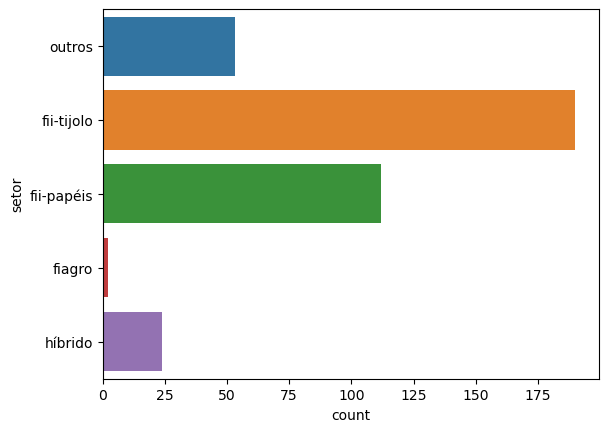

In [33]:
sns.countplot(data = fiis_class,
               y = 'setor')

<Axes: xlabel='count', ylabel='subsetor'>

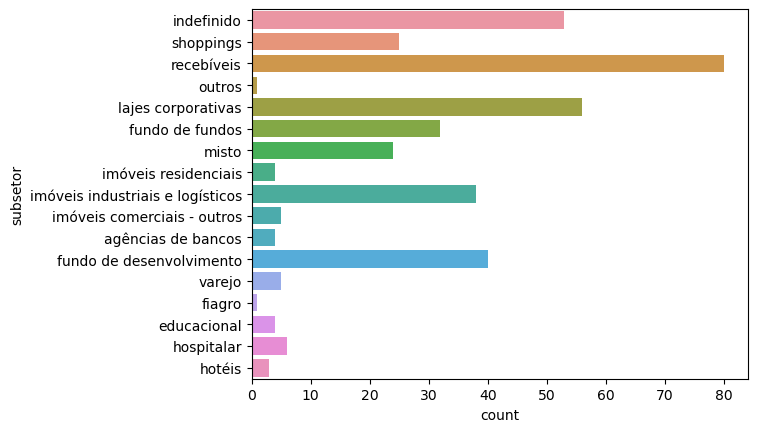

In [34]:
sns.countplot(data = fiis_class,
               y = 'subsetor')

In [36]:
fiis_class[['ticker','subsetor','pvp', 'pl_milhoes_reais', 'vpa','preco']].sort_values(by='pvp', 
                                                  ascending=False)

,ticker,subsetor,pvp,pl_milhoes_reais,vpa,preco
253,PRTS11,shoppings,1961.67,3.111607e+06,NaN,117.70
324,SRVD11,indefinido,573.00,6.057642e+05,0.000001,5.73
162,IBFF11,fundo de fundos,4.49,9.855905e+06,0.000073,66.40
151,HRDF11,fundo de desenvolvimento,4.35,8.608858e+06,NaN,4.81
182,KINP11,fundo de desenvolvimento,2.66,2.640861e+07,0.000005,9.82
...,...,...,...,...,...,...
350,VJFD11,recebíveis,NaN,6.654949e+08,0.000133,NaN
351,VLIQ11,indefinido,NaN,NaN,NaN,NaN
359,VTPL11,recebíveis,NaN,1.069183e+08,NaN,NaN
370,XPID11,fundo de desenvolvimento,NaN,NaN,NaN,90.23


## Preço / Valor patrimonial

In [ ]:
with sns.axes_style('whitegrid'):
    sns.boxplot(x = fiis_class['pvp'][fiis_class['pvp']<3],
                y = fiis_class['subsetor'])

In [ ]:
fiis_class.sort_values(by='dy_12m_acum', ascending=False).head(20)

## Dividend Yield

In [ ]:
with sns.axes_style('whitegrid'):
    ax = sns.boxplot(x = fiis_class.dy_12m_acum [fiis_class['dy_12m_acum']<20],
                y = fiis_class['subsetor'])
    ax.axvline(x = 13.75)    # Line on x = 2
           

## Patrimônio Líquido

In [ ]:
fiis_class[['ticker','subsetor','pvp','pl_milhoes_reais']].sort_values(by = 'pl_milhoes_reais', ascending = False).head(20)

In [ ]:
sns.barplot(data = fiis_class.sort_values(by='pl'),
             y = 'subsetor',
             x = 'pl')

In [ ]:
fiis = page.get_text('a').split('\n')[246:]
fiis.find

In [ ]:
tabela.text